CELL-1 : IMPORTING THE REQUIRED LIBRARIES AND LOAD DATA

In [16]:
import os 
import pandas as pd
import numpy as np

project_path=os.path.abspath(os.path.join(os.getcwd(),".."))
process_path=os.path.join(project_path,"Data","Processed","Stroke Processed Data.csv")
df=pd.read_csv(process_path)
print(df.head())
display(df.isnull().sum())

      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
1  51676       0  61.0             0              0             1          3   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             202.21  29.0               2       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1  


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

CELL-2 : SEGRIGATTING THE DATA TO INPUT(X) AND OUTPUT(Y)

In [17]:
x=df.iloc[:,1:11]
y=df["stroke"]
print(x.shape)
print(y.shape)

(549, 10)
(549,)


CELL-3 : SPLITTING THE DATA FOR TRAINING AND TESTING

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(439, 10)
(439,)
(110, 10)
(110,)


CELL-4 : COMPARING ALGORITHMS

c:\Users\TBM\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\TBM\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

LR:73.350951
GNB:74.032770
DTC:62.399577
RFC:72.896406
KNN:68.800211
SVM:72.431290


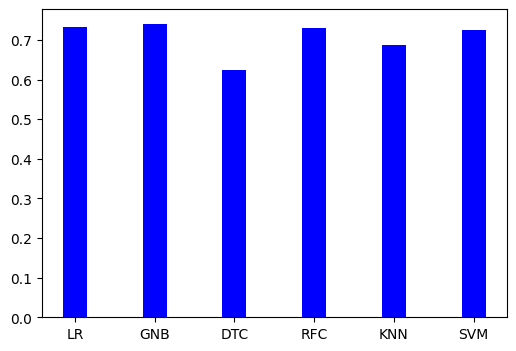

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models=[]
models.append(("LR",LogisticRegression()))
models.append(("GNB",GaussianNB()))
models.append(("DTC",DecisionTreeClassifier()))
models.append(("RFC",RandomForestClassifier()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("SVM",SVC()))


names=[]
res=[]
result=[]
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot as plt
for name,model in models:
    kfold=StratifiedKFold(n_splits=10)
    score=cross_val_score(model,x_train,y_train,cv=kfold,scoring="accuracy")
    names.append(name)
    res.append(score)
    result.append(score.mean())
    print('%s:%f'%(name,score.mean()*100))
plt.figure(figsize=(6,4))
plt.bar(names,result,color="b",width=0.3)
plt.show()

CELL-5 : MODEL TRAINING

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)
predict=model.predict(x_test)
print(predict)
model_path=os.path.join(project_path,"Models","Gaussian_model.pkl")
import pickle
with open (model_path,"wb") as f:
    pickle.dump(model,f)